In [1]:
import pandas as pd
import numpy as np
from fbprophet import Prophet

In [11]:
# read csv
df = pd.read_csv('TimeSeriesExamplesGasPrices.csv', parse_dates=True)
print(df.head())

          ds      y
0  1/21/1991  1.192
1  1/28/1991  1.168
2   2/4/1991  1.139
3  2/11/1991  1.106
4  2/18/1991  1.078


In [12]:
# instantiate a new Prophet object
m = Prophet()
m.fit(df)

INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [13]:
# create df with future dates 
#### this did daiy, need to tell it weekly.....
future = m.make_future_dataframe(periods=52)
future.tail()

,ds
1374,2016-08-07
1375,2016-08-08
1376,2016-08-09
1377,2016-08-10
1378,2016-08-11


In [14]:
# create predictions, with confidence intervals
forecast = m.predict(future)
forecast[['ds', 'yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1374,2016-08-07,2.662283,2.250804,3.094999
1375,2016-08-08,2.661277,2.271192,3.055045
1376,2016-08-09,2.660372,2.220502,3.081157
1377,2016-08-10,2.659574,2.258732,3.055563
1378,2016-08-11,2.658889,2.235683,3.045074


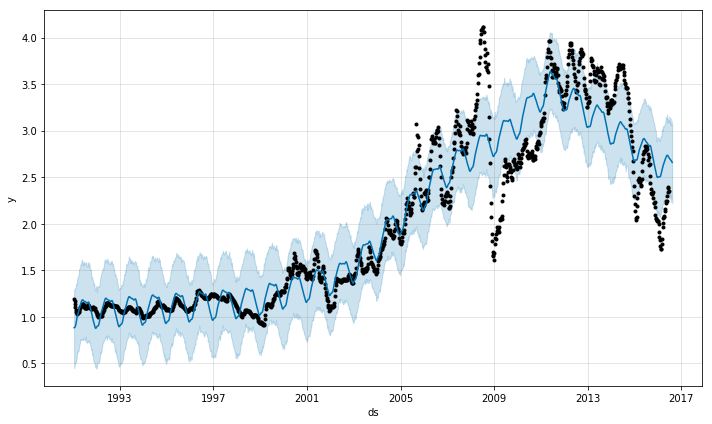

In [15]:
# plot the forecast
m.plot(forecast)

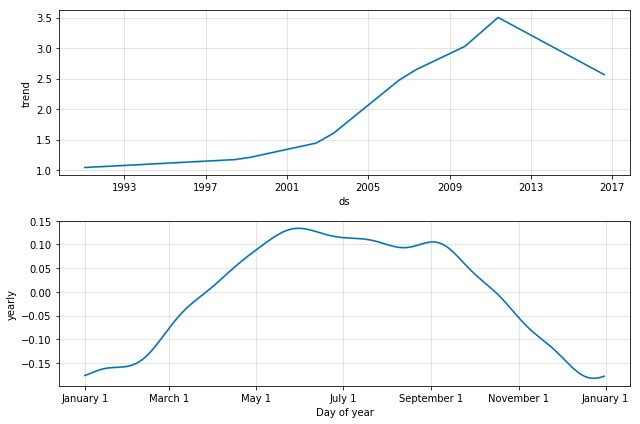

In [18]:
# plot forecast components
m.plot_components(forecast)